This notebook aims to delve into AirBnB's Boston Housing dataset and provide answers to three main questions:

1. Are prices predominantly influenced by a listing's location or by its amenities and features?

2. What is the correlation between a listing's comments/reviews and the scores it receives?

3. How effective are the provided data attributes in predicting a listing's price?

In [1]:


import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 


### 1. Are prices predominantly influenced by a listing's location or by its amenities and features?

In [2]:
# read data
df_listing = pd.read_csv('boston_listings.csv')
df_listing.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",...,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...",...,9.0,f,NaN,NaN,t,moderate,f,f,1,1.30
2,6976,https://www.airbnb.com/rooms/6976,20160906204935,2016-09-07,Mexican Folk Art Haven in Boston,"Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...",none,The LOCATION: Roslindale is a safe and diverse...,...,10.0,f,NaN,NaN,f,moderate,t,f,1,0.47
3,1436513,https://www.airbnb.com/rooms/1436513,20160906204935,2016-09-07,Spacious Sunny Bedroom Suite in Historic Home,Come experience the comforts of home away from...,Most places you find in Boston are small howev...,Come experience the comforts of home away from...,none,Roslindale is a lovely little neighborhood loc...,...,10.0,f,NaN,NaN,f,moderate,f,f,1,1.00
4,7651065,https://www.airbnb.com/rooms/7651065,20160906204935,2016-09-07,Come Home to Boston,"My comfy, clean and relaxing home is one block...","Clean, attractive, private room, one block fro...","My comfy, clean and relaxing home is one block...",none,"I love the proximity to downtown, the neighbor...",...,10.0,f,NaN,NaN,f,flexible,f,f,1,2.25


In [3]:
df_reviews = pd.read_csv('reviews.csv')
df_reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,1178162,4724140,2013-05-21,4298113,Olivier,My stay at islam's place was really cool! Good...
1,1178162,4869189,2013-05-29,6452964,Charlotte,Great location for both airport and city - gre...
2,1178162,5003196,2013-06-06,6449554,Sebastian,We really enjoyed our stay at Islams house. Fr...
3,1178162,5150351,2013-06-15,2215611,Marine,The room was nice and clean and so were the co...
4,1178162,5171140,2013-06-16,6848427,Andrew,Great location. Just 5 mins walk from the Airp...


In [4]:
df_listing.describe()
df_listing.shape

(3585, 95)

In [5]:
# select columns that we are interested in
cols = ['id', 'host_since', 'host_is_superhost', 'host_total_listings_count', 
           'neighbourhood', 'city', 'property_type', 'room_type', 'accommodates', 
           'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', 
           'square_feet', 'price', 'guests_included', 
           'first_review', 'last_review', 'review_scores_rating', 
           'review_scores_accuracy', 'review_scores_cleanliness',
           'review_scores_checkin', 'review_scores_communication',
           'review_scores_location', 'review_scores_value']

df_listing = df_listing[cols]
df_listing.shape

(3585, 26)

In [6]:
cat_vars = df_listing.select_dtypes(include=['object']).columns
cat_vars

Index(['host_since', 'host_is_superhost', 'neighbourhood', 'city',
       'property_type', 'room_type', 'bed_type', 'amenities', 'price',
       'first_review', 'last_review'],
      dtype='object')

In [7]:
num_vars = df_listing.select_dtypes(include=['float', 'int']).columns
num_vars

Index(['id', 'host_total_listings_count', 'accommodates', 'bathrooms',
       'bedrooms', 'beds', 'square_feet', 'guests_included',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value'],
      dtype='object')

In [8]:
df_listing['price'].head()

0    $250.00
1     $65.00
2     $65.00
3     $75.00
4     $79.00
Name: price, dtype: object

In [9]:
df_listing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3585 entries, 0 to 3584
Data columns (total 26 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           3585 non-null   int64  
 1   host_since                   3585 non-null   object 
 2   host_is_superhost            3585 non-null   object 
 3   host_total_listings_count    3585 non-null   int64  
 4   neighbourhood                3042 non-null   object 
 5   city                         3583 non-null   object 
 6   property_type                3582 non-null   object 
 7   room_type                    3585 non-null   object 
 8   accommodates                 3585 non-null   int64  
 9   bathrooms                    3571 non-null   float64
 10  bedrooms                     3575 non-null   float64
 11  beds                         3576 non-null   float64
 12  bed_type                     3585 non-null   object 
 13  amenities         

In [10]:

df_listing['price']= df_listing['price'][1:].replace('[\$,]', '', regex=True).astype(float)




In [11]:
df_listing.info()
df_listing['price'].head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3585 entries, 0 to 3584
Data columns (total 26 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           3585 non-null   int64  
 1   host_since                   3585 non-null   object 
 2   host_is_superhost            3585 non-null   object 
 3   host_total_listings_count    3585 non-null   int64  
 4   neighbourhood                3042 non-null   object 
 5   city                         3583 non-null   object 
 6   property_type                3582 non-null   object 
 7   room_type                    3585 non-null   object 
 8   accommodates                 3585 non-null   int64  
 9   bathrooms                    3571 non-null   float64
 10  bedrooms                     3575 non-null   float64
 11  beds                         3576 non-null   float64
 12  bed_type                     3585 non-null   object 
 13  amenities         

0     NaN
1    65.0
2    65.0
3    75.0
4    79.0
Name: price, dtype: float64

In [12]:
df_listing.amenities.value_counts()

{}                                                                                                                                                                                                                                                                                                                  32
{TV,"Cable TV","Wireless Internet","Air Conditioning",Kitchen,Heating,Washer,Dryer,"translation missing: en.hosting_amenity_49","translation missing: en.hosting_amenity_50"}                                                                                                                                       15
{TV,"Cable TV",Internet,"Wireless Internet","Air Conditioning",Kitchen,Gym,"Elevator in Building","Buzzer/Wireless Intercom",Heating,"Family/Kid Friendly",Washer,Dryer,"Smoke Detector","Carbon Monoxide Detector",Essentials,Shampoo,"24-Hour Check-in",Hangers,"Hair Dryer",Iron,"Laptop Friendly Workspace"}    14
{TV,"Cable TV","Wireless Internet","Air Conditioning",Kitchen,Heati

In [13]:
df_listing['num_amenities'] = df_listing['amenities'].apply(lambda listing: str(listing).count(',') + 1 )


In [14]:
df_listing.drop(['amenities'], inplace=True, axis=1)

In [15]:
df_listing['num_amenities'].head()

0    15
1    21
2    18
3    23
4    14
Name: num_amenities, dtype: int64

In [16]:
features = ['property_type', 'room_type', 'accommodates', 
           'bathrooms', 'bedrooms', 'beds', 'bed_type', 'num_amenities', 
           'square_feet']

In [17]:
df_listing[features].head()

,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,num_amenities,square_feet
0,House,Entire home/apt,4,1.5,2.0,3.0,Real Bed,15,NaN
1,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,21,NaN
2,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,18,NaN
3,House,Private room,4,1.0,1.0,2.0,Real Bed,23,NaN
4,House,Private room,2,1.5,1.0,2.0,Real Bed,14,NaN


In [18]:
df_listing.square_feet.isnull().mean()

0.9843793584379359

In [19]:
df_listing.drop(['square_feet'], inplace=True, axis=1)

In [20]:
df_listing['property_type'].value_counts()

Apartment          2612
House               562
Condominium         231
Townhouse            54
Bed & Breakfast      41
Loft                 39
Other                17
Boat                 12
Villa                 6
Entire Floor          4
Dorm                  2
Guesthouse            1
Camper/RV             1
Name: property_type, dtype: int64

In [21]:
df_listing.groupby(by='property_type')['price'].describe().sort_values(by='mean', ascending=False)

,count,mean,std,min,25%,50%,75%,max
property_type,,,,,,,,
Guesthouse,1.0,289.000000,NaN,289.0,289.00,289.0,289.00,289.0
Boat,12.0,268.833333,77.754665,175.0,209.00,262.5,292.50,425.0
Other,17.0,229.941176,143.438345,40.0,130.00,218.0,300.00,500.0
Condominium,231.0,190.246753,122.218815,30.0,104.00,160.0,234.50,700.0
Villa,6.0,189.500000,142.131981,40.0,77.50,170.0,275.25,400.0
Loft,39.0,185.410256,103.999170,30.0,110.00,166.0,245.00,500.0
Apartment,2612.0,181.966692,154.323177,10.0,99.00,159.0,229.00,4000.0
Townhouse,54.0,149.037037,126.163261,44.0,75.00,99.0,170.00,700.0
House,561.0,131.388592,131.142475,20.0,65.00,84.0,140.00,1300.0


In [22]:
df_listing.groupby(by='room_type')['price'].describe().sort_values(by='mean', ascending=False)

,count,mean,std,min,25%,50%,75%,max
room_type,,,,,,,,
Entire home/apt,2126.0,227.426152,157.889143,11.0,150.0,199.0,269.0,4000.0
Private room,1378.0,96.041364,85.093706,10.0,62.0,80.0,100.0,1400.0
Shared room,80.0,92.762500,108.733822,20.0,45.0,60.0,99.0,750.0


In [23]:
df_listing.groupby(by='bed_type')['price'].describe().sort_values(by='mean', ascending=False)

,count,mean,std,min,25%,50%,75%,max
bed_type,,,,,,,,
Real Bed,3452.0,177.182213,149.728746,10.0,89.00,150.0,225.00,4000.0
Pull-out Sofa,31.0,101.612903,54.262128,35.0,68.50,80.0,114.50,250.0
Couch,10.0,99.600000,59.673556,22.0,64.75,100.0,122.50,225.0
Futon,51.0,85.254902,40.607311,28.0,56.00,75.0,99.00,200.0
Airbed,40.0,78.675000,82.029822,29.0,34.75,45.0,96.25,500.0


In [24]:
room_values = {'Entire home/apt': 25, 'Private room': 10, 'Shared room': 1}
df_listing['room_type_value'] = df_listing['room_type'].apply(lambda value: room_values[value])

In [25]:
df_listing['room_type_value'].head()

0    25
1    10
2    10
3    10
4    10
Name: room_type_value, dtype: int64

In [26]:
bed_values = {'Real Bed': 25,'Pull-out Sofa': 10,'Couch': 1,'Futon': 1,'Airbed': 1}
df_listing['bed_type_value'] = df_listing['bed_type'].apply(lambda value: bed_values[value])

In [27]:
df_listing['bed_type_value'].head()

0    25
1    25
2    25
3    25
4    25
Name: bed_type_value, dtype: int64

In [28]:
features = ['room_type_value', 'accommodates', 'bathrooms', 
            'bedrooms', 'beds', 'bed_type_value', 'num_amenities']

In [29]:
# Define aggregator function
def sum_features_amenities(listing):
    '''
    INPUT:
        - listing: Record (row) of DataFrame
    
    OUTPUT:
        - value: Aggregation of number of features for each listing
        
    Iterates over different features of each listing and 
    sums the value for each feature to compute a total
    feature value.
    '''
    value = 0
    for feature in features:
        value = value + listing[feature]
    return value

# Aggregate
df_listing['feat_amen_total'] = df_listing.apply(sum_features_amenities, axis = 1)

In [30]:
df_listing['feat_amen_total'].head()

0    75.5
1    61.0
2    58.0
3    66.0
4    55.5
Name: feat_amen_total, dtype: float64

In [31]:
df_listing.groupby(by=['city'])['price'].mean()

city
ALLSTON                      165.000000
Allston                       73.250000
Boston                       176.767456
Boston                        65.000000
Boston (Charlestown)         200.000000
Boston (Jamaica Plain)        75.000000
Boston, Massachusetts, US     50.000000
Brighton                     108.400000
Brighton                      90.000000
Brookline                    135.888889
Cambridge                    199.375000
Charlestown                  262.533333
Dorchester                    75.466667
East Boston                  134.666667
Hyde Park                     77.500000
Jamaica Plain                178.055556
Jamaica Plain                 68.500000
Jamaica Plain (Boston)       150.000000
Jamaica Plain, Boston        119.000000
Jamaica Plain, MA            120.000000
Jamaica plain                125.000000
Mattapan                      85.000000
Milton                        50.000000
Mission Hill, Boston          85.000000
Newton                        90.00

In [32]:
def city_cleaner(listing):
    '''
    INPUT:
        - listing: Record (row) of DataFrame
        
    OUTPUT:
        - string: Cleaned name of city to which each listing belongs
        
    Transforms the 'city' value of each listing to lowercase,
    and looks for presence of messy city names in each value. 
    It then returns the corresponding, 'clean' value of 'city'
    for each listing.
    '''
    # To lowercase
    listing = listing['city'].lower()
    
    # Turn 'messy' values into 'clean' values
    if 'allston' in listing:
        return 'Allston'
    elif 'boston' in listing or '波士顿' in listing: 
        return 'Boston'
    elif 'brighton' in listing:
        return 'Brighton'
    elif 'dorchester' in listing:
        return 'Dorchester'
    elif 'east boston' in listing:
        return 'East Boston'
    elif 'jamaica plain' in listing:
        return 'Jamaica Plain'
    elif 'roslindale' in listing:
        return 'Roslindale'
    elif 'roxbury' in listing:
        return 'Roxbury'
    elif 'south' in listing:
        return 'South Boston'

In [33]:
df_listing['city'] = df_listing['city'].fillna('Boston')
df_listing['city'] = df_listing.apply(city_cleaner, axis=1)

In [34]:
df_listing.groupby(by=['city'])['price'].mean().sort_values(ascending=False)

city
Boston           176.405056
Jamaica Plain    163.045455
Brighton         107.250000
Roxbury           93.060606
Allston           86.357143
Roslindale        83.000000
Dorchester        75.466667
Name: price, dtype: float64

In [35]:
def amenity_feature_grouper(score):
    '''
    INPUT:
        - score: Aggregated value for the features of each listing (computed with sum_features_amenities())
        
    OUTPUT:
        - string: Category (quantile) to which each listing 
                  belongs according to the sum of its features and amenities.
                  
    Identifies the first, second, and third quartiles of 'feat_amen_total'.
    Then returns the group to which each listing belongs to according to its score
    for this variable.
    '''
    # Identify quartiles
    Q1 = df_listing['feat_amen_total'].quantile(0.25)
    Q2 = df_listing['feat_amen_total'].quantile(0.5)
    Q3 = df_listing['feat_amen_total'].quantile(0.75)
    
    # Group scores
    if score <= Q1:
        return 'Lower Quantile'
    elif Q1 < score and score <= Q2:
        return 'Mid-Lower Quantile'
    elif Q2 < score and score <= Q3:
        return 'Mid-Upper Quantile'
    elif Q3 < score:
        return 'Upper Quantile'

In [36]:
df_listing['feat_amen_group'] = df_listing['feat_amen_total'].apply(amenity_feature_grouper)

print(df_listing['feat_amen_group'].head())

df_listing.groupby(by=['feat_amen_group'])['price'].mean().sort_values(ascending=False)

0    Mid-Upper Quantile
1    Mid-Lower Quantile
2    Mid-Lower Quantile
3    Mid-Lower Quantile
4        Lower Quantile
Name: feat_amen_group, dtype: object


feat_amen_group
Upper Quantile        277.678867
Mid-Upper Quantile    201.561884
Mid-Lower Quantile    131.393404
Lower Quantile         93.326294
Name: price, dtype: float64

In [37]:
feat_amen_desc = df_listing.groupby(by='feat_amen_group')['price'].describe().sort_values(by='mean', ascending=False)

In [38]:
feat_amen_desc

,count,mean,std,min,25%,50%,75%,max
feat_amen_group,,,,,,,,
Upper Quantile,847.0,277.678867,208.788079,49.0,189.0,249.0,319.0,4000.0
Mid-Upper Quantile,913.0,201.561884,94.803101,11.0,146.0,189.0,239.0,1250.0
Mid-Lower Quantile,849.0,131.393404,88.980458,20.0,79.0,114.0,155.0,1345.0
Lower Quantile,947.0,93.326294,99.373844,10.0,59.0,75.0,100.0,1400.0


In [39]:
city_desc = df_listing.groupby(by='city')['price'].describe().sort_values(by='mean', ascending=False)

In [40]:
city_desc

,count,mean,std,min,25%,50%,75%,max
city,,,,,,,,
Boston,3402.0,176.405056,149.837124,10.0,88.00,150.0,225.00,4000.0
Jamaica Plain,22.0,163.045455,106.152845,60.0,77.75,120.0,250.00,450.0
Brighton,16.0,107.250000,61.372632,50.0,68.75,87.5,108.50,250.0
Roxbury,33.0,93.060606,62.088112,20.0,55.00,74.0,100.00,300.0
Allston,14.0,86.357143,63.715240,35.0,61.25,67.5,93.25,295.0
Roslindale,6.0,83.000000,23.579652,58.0,63.75,82.5,93.75,120.0
Dorchester,15.0,75.466667,55.918137,40.0,48.50,60.0,75.50,264.0


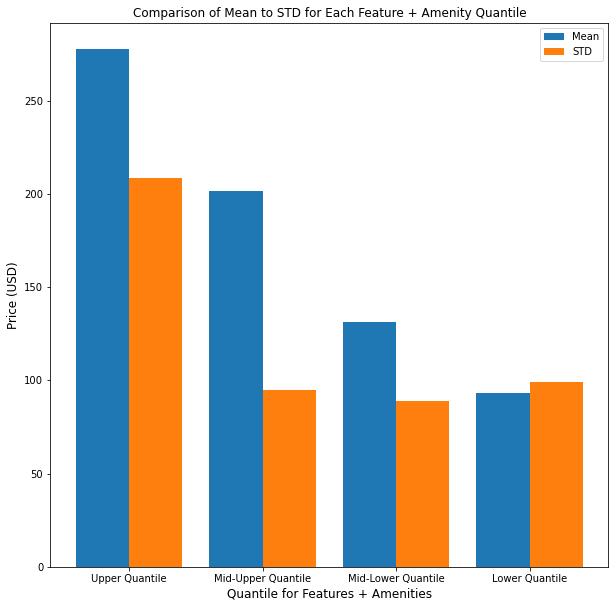

In [41]:
plt.figure(figsize=(10,10))
plt.bar(x=np.arange(feat_amen_desc.index.size), height=feat_amen_desc['mean'], width=0.40, label='Mean')
plt.bar(x=np.arange(feat_amen_desc.index.size) + 0.40, height=feat_amen_desc['std'], width=0.40, label='STD')
plt.xticks(np.arange(feat_amen_desc.index.size) + 0.20, feat_amen_desc.index.values)
plt.xlabel('Quantile for Features + Amenities', fontsize='large')
plt.ylabel('Price (USD)', fontsize='large')
plt.legend()
plt.title('Comparison of Mean to STD for Each Feature + Amenity Quantile')
plt.show()

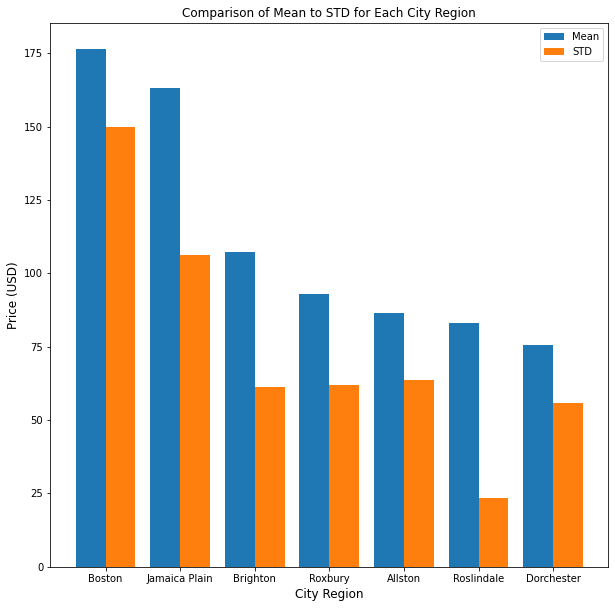

In [42]:
plt.figure(figsize=(10,10))
plt.bar(x=np.arange(city_desc.index.size), height=city_desc['mean'], width=0.40, label='Mean')
plt.bar(x=np.arange(city_desc.index.size) + 0.40, height=city_desc['std'], width=0.40, label='STD')
plt.xticks(np.arange(city_desc.index.size) + 0.20, city_desc.index.values)
plt.xlabel('City Region', fontsize='large')
plt.ylabel('Price (USD)', fontsize='large')
plt.legend()
plt.title('Comparison of Mean to STD for Each City Region')
plt.show()

In [43]:
def avg_std(df):
    '''
    INPUT:
        - df: DataFrame to compute mean of statistics
    
    OUTPUT:
        - avg_std: Average of std-to-mean ratios for each row of the DataFrame.
        
    Computes the ratio of std to mean for each row of the DataFrame. 
    Then returns the mean of these ratios.
    '''
    return (df['std'] / df['mean']).mean()

In [44]:
print('Features and Amenities:', avg_std(feat_amen_desc))
print('City:', avg_std(city_desc))

Features and Amenities: 0.7410634320564875
City: 0.6432487820020005


Based on the results, it can be concluded that the deviation size for the Features and Amenities is 10% greater than the deviation size for the City. This indicates that the prices in the dataset are slightly more dispersed with respect to the characteristics such as amenities, etc., compared to the location of the listing. However, the difference in concentration is not significant.

### 2. What is the correlation between a listing's comments and the scores it receives?

In [45]:
neg_dict = np.asarray(pd.read_csv('negative-words.txt', skiprows=37, sep='\t', header=None, encoding='ISO-8859-1')).reshape(len(pd.read_csv('negative-words.txt', skiprows=37, sep='\t', header=None, encoding='ISO-8859-1')))
pos_dict = np.asarray(pd.read_csv('positive-words.txt', skiprows=36, sep='\t', header=None)).reshape(len(pd.read_csv('positive-words.txt', skiprows=36, sep='\t', header=None)))

In [46]:
print(neg_dict)

['abnormal' 'abolish' 'abominable' ... 'zealous' 'zealously' 'zombie']


In [47]:
print(pos_dict)

['abound' 'abounds' 'abundance' ... 'zenith' 'zest' 'zippy']


In [48]:
import string

punctuation = []
for i in range(len(string.punctuation)):
    punctuation.append(string.punctuation[i])


def sentiment_gauger(review):
    '''
    INPUT: 
        - review: String of words relating to a review of a listing.
        
    OUTPUT:
        - weighted sentiment: Calculated average sentiment of the review passed on. 
        
    Removes the puncutation from the review and transforms the string to lowercase.
    Splits the review into a list of words, and then aggregates the positive (+1) and
    negative (-1) words in the review to gauge a sentiment. 
    Returns the sentiment divided by the number of words in the review.
    '''
    
    # Initialize counter
    sentiment = 0
    
    # To lowercase
    review = review.lower()
    
    # Remove puncutation
    for p in punctuation:
        review = review.replace(p, '')
        
    # Split review into list of words
    words = review.split(' ')
    
    # Compute sentiment 
    for word in words:
        if word in pos_dict:
            sentiment += 1
        elif word in neg_dict:
            sentiment += -1
            
    return sentiment / len(words)  

In [49]:
df_reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,1178162,4724140,2013-05-21,4298113,Olivier,My stay at islam's place was really cool! Good...
1,1178162,4869189,2013-05-29,6452964,Charlotte,Great location for both airport and city - gre...
2,1178162,5003196,2013-06-06,6449554,Sebastian,We really enjoyed our stay at Islams house. Fr...
3,1178162,5150351,2013-06-15,2215611,Marine,The room was nice and clean and so were the co...
4,1178162,5171140,2013-06-16,6848427,Andrew,Great location. Just 5 mins walk from the Airp...


In [50]:
df_reviews['id'] = df_reviews['listing_id']
df_reviews.head()


,listing_id,id,date,reviewer_id,reviewer_name,comments
0,1178162,1178162,2013-05-21,4298113,Olivier,My stay at islam's place was really cool! Good...
1,1178162,1178162,2013-05-29,6452964,Charlotte,Great location for both airport and city - gre...
2,1178162,1178162,2013-06-06,6449554,Sebastian,We really enjoyed our stay at Islams house. Fr...
3,1178162,1178162,2013-06-15,2215611,Marine,The room was nice and clean and so were the co...
4,1178162,1178162,2013-06-16,6848427,Andrew,Great location. Just 5 mins walk from the Airp...


In [51]:
df_reviews.drop(['listing_id'], axis=1, inplace=True)

In [52]:
df_reviews.head()

,id,date,reviewer_id,reviewer_name,comments
0,1178162,2013-05-21,4298113,Olivier,My stay at islam's place was really cool! Good...
1,1178162,2013-05-29,6452964,Charlotte,Great location for both airport and city - gre...
2,1178162,2013-06-06,6449554,Sebastian,We really enjoyed our stay at Islams house. Fr...
3,1178162,2013-06-15,2215611,Marine,The room was nice and clean and so were the co...
4,1178162,2013-06-16,6848427,Andrew,Great location. Just 5 mins walk from the Airp...


In [53]:
df = df_listing.join(df_reviews, on='id', rsuffix='_right', how='inner')

In [54]:
df_reviews.shape[0] - df.shape[0]

68207

In [55]:
df['review_sentiment'] = df['comments'].apply(sentiment_gauger)

df['review_sentiment'].head()

2      0.028571
166    0.066667
232    0.082353
391    0.046296
400    0.038462
Name: review_sentiment, dtype: float64

In [56]:
def heatmap(data, features, title):
    '''
        INPUT:
            - data: DataFrame with correlation statistics
            - features: Array of strings with names of features being correlated

        OUTPUT:
            - Heatmap of the correlation statistics between the variables
    '''
    
    # Create heatmap
    fig, ax = plt.subplots()
    im = ax.imshow(df[features].corr())

    # Set title
    ax.set_title(title)
    
    # Set X-axis ticks and labels
    ax.set_xticks(np.arange(2))
    ax.set_xticklabels(features)
    
    # Set Y-axis ticks and labels
    ax.set_yticks(np.arange(2))
    ax.set_yticklabels(features)

    # Set colorbar to gauge correlation
    cbar = ax.figure.colorbar(im, ax=ax)
    cbarlabel = cbar.ax.set_ylabel('Correlation')

    # Include values in each square for reference
    for col in np.arange(len(features)):
        for row in np.arange(len(features)):
            ax.text(col, row, '{:.3f}'.format(df[features].corr().iloc[col, row]),
                       ha='center', va='center', color='w', fontweight='bold')
    # Show heatmap
    plt.show()

In [57]:
df[['review_sentiment', 'price']].corr()

,review_sentiment,price
review_sentiment,1.000000,-0.146845
price,-0.146845,1.000000


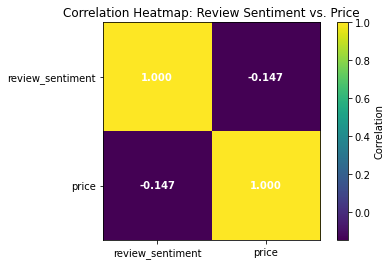

In [58]:
heatmap(df[['review_sentiment', 'price']].corr(), 
        ['review_sentiment', 'price'],
        'Correlation Heatmap: Review Sentiment vs. Price')

In [59]:
df[['review_sentiment', 'review_scores_rating']].corr()

,review_sentiment,review_scores_rating
review_sentiment,1.000000,-0.111337
review_scores_rating,-0.111337,1.000000


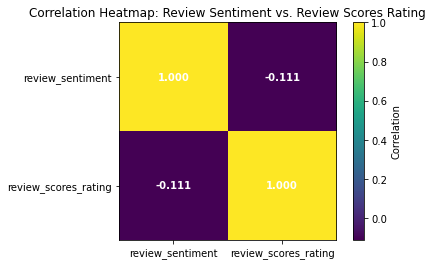

In [60]:
heatmap(df[['review_sentiment', 'review_scores_rating']].corr(), 
        ['review_sentiment', 'review_scores_rating'],
        'Correlation Heatmap: Review Sentiment vs. Review Scores Rating')

Based on the obtained answers, it seems that there is a weak correlation between the price of a listing and the sentiment expressed in its reviews. Additionally, the sentiment of the reviews does not seem to have a strong correlation with the rating of the listing. These results suggest that the current method used to evaluate the sentiment in the reviews may not be optimal. A more effective approach would involve gathering a larger dataset that links listing comments with ratings and then training a multilayer perceptron (MLP) to accurately gauge the sentiment of each comment.

Moreover, the findings imply that guests often provide insufficient information in their comments regarding why they rated a listing in a particular way. This underscores the importance of positive comments for AirBnB hosts. Since guests tend to provide limited information in their comments, the interpretation of these comments by potential guests browsing the listing online can be highly subjective. Given the unpredictable nature of human subjectivity and the tendency to make inferences based on limited information, AirBnB hosts should aim to avoid negative comments that could have an overwhelming impact on how they are perceived.

### 3. How effective are the provided data attributes in predicting a listing's price?

In [61]:
df_listing.columns

Index(['id', 'host_since', 'host_is_superhost', 'host_total_listings_count',
       'neighbourhood', 'city', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'price', 'guests_included',
       'first_review', 'last_review', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value', 'num_amenities',
       'room_type_value', 'bed_type_value', 'feat_amen_total',
       'feat_amen_group'],
      dtype='object')

In [62]:
cat_vars = df_listing.select_dtypes(include=['object']).columns

In [63]:
cat_vars

Index(['host_since', 'host_is_superhost', 'neighbourhood', 'city',
       'property_type', 'room_type', 'bed_type', 'first_review', 'last_review',
       'feat_amen_group'],
      dtype='object')

In [64]:
num_vars = df_listing.select_dtypes(include=['float', 'int']).columns

In [65]:
num_vars

Index(['id', 'host_total_listings_count', 'accommodates', 'bathrooms',
       'bedrooms', 'beds', 'price', 'guests_included', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value', 'num_amenities',
       'room_type_value', 'bed_type_value', 'feat_amen_total'],
      dtype='object')

In [66]:
numeric = ['host_since', 'host_total_listings_count', 'accommodates', 'bathrooms', 'beds', 'guests_included', 
           'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin',
           'review_scores_communication', 'review_scores_location', 'review_scores_value', 'num_amenities',
           'room_type_value', 'bed_type_value', 'feat_amen_total']

In [67]:
categorical = ['host_is_superhost', 'neighbourhood', 'city']

In [68]:
df_listing['host_since'] = df_listing['host_since'].apply(lambda date: 2016 - int(date[:4]))

In [69]:
df_listing.host_since.head()

0    1
1    4
2    7
3    3
4    2
Name: host_since, dtype: int64

In [70]:
[np.concatenate([numeric, categorical, ['price']])]

[array(['host_since', 'host_total_listings_count', 'accommodates',
        'bathrooms', 'beds', 'guests_included', 'review_scores_rating',
        'review_scores_accuracy', 'review_scores_cleanliness',
        'review_scores_checkin', 'review_scores_communication',
        'review_scores_location', 'review_scores_value', 'num_amenities',
        'room_type_value', 'bed_type_value', 'feat_amen_total',
        'host_is_superhost', 'neighbourhood', 'city', 'price'],
       dtype='<U27')]

In [71]:
df_listing_clean = df_listing.dropna(how='any', subset=np.concatenate([numeric, categorical]), axis=0)[np.concatenate([numeric, categorical, ['price']])]

df_listing_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2310 entries, 1 to 3574
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   host_since                   2310 non-null   int64  
 1   host_total_listings_count    2310 non-null   int64  
 2   accommodates                 2310 non-null   int64  
 3   bathrooms                    2310 non-null   float64
 4   beds                         2310 non-null   float64
 5   guests_included              2310 non-null   int64  
 6   review_scores_rating         2310 non-null   float64
 7   review_scores_accuracy       2310 non-null   float64
 8   review_scores_cleanliness    2310 non-null   float64
 9   review_scores_checkin        2310 non-null   float64
 10  review_scores_communication  2310 non-null   float64
 11  review_scores_location       2310 non-null   float64
 12  review_scores_value          2310 non-null   float64
 13  num_amenities     

In [72]:
X = df_listing_clean.drop(['price'], axis=1)
y = df_listing_clean['price']

In [73]:
X = pd.get_dummies(X)

In [74]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X[numeric] = scaler.fit_transform(X[numeric])

In [75]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=42)

In [76]:
# model 1: SVR

from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

regressor_1 = SVR()

kernel = ['linear', 'poly', 'rbf']
gamma = [0.001, 0.01, 0.1, 1]
c = [0.001, 0.01, 0.1, 1, 10]
epsilon = [0.01, 0.1, 1.0]
params = {'gamma': gamma, 'C': c, 'kernel': kernel, 'epsilon': epsilon}

grid_1 = GridSearchCV(regressor_1, param_grid=params, scoring='neg_mean_squared_error', verbose=4)
grid_result_1 = grid_1.fit(X_train, y_train)


Fitting 5 folds for each of 180 candidates, totalling 900 fits
[CV 1/5] END C=0.001, epsilon=0.01, gamma=0.001, kernel=linear;, score=-12737.436 total time=   0.1s
[CV 2/5] END C=0.001, epsilon=0.01, gamma=0.001, kernel=linear;, score=-11955.033 total time=   0.1s
[CV 3/5] END C=0.001, epsilon=0.01, gamma=0.001, kernel=linear;, score=-11099.312 total time=   0.1s
[CV 4/5] END C=0.001, epsilon=0.01, gamma=0.001, kernel=linear;, score=-20323.451 total time=   0.1s
[CV 5/5] END C=0.001, epsilon=0.01, gamma=0.001, kernel=linear;, score=-12411.498 total time=   0.1s
[CV 1/5] END C=0.001, epsilon=0.01, gamma=0.001, kernel=poly;, score=-12754.458 total time=   0.1s
[CV 2/5] END C=0.001, epsilon=0.01, gamma=0.001, kernel=poly;, score=-11972.683 total time=   0.1s
[CV 3/5] END C=0.001, epsilon=0.01, gamma=0.001, kernel=poly;, score=-11116.910 total time=   0.1s
[CV 4/5] END C=0.001, epsilon=0.01, gamma=0.001, kernel=poly;, score=-20343.662 total time=   0.1s
[CV 5/5] END C=0.001, epsilon=0.01, 

In [77]:
y_pred = grid_result_1.best_estimator_.predict(X_test)
print('MSE Score:', mean_squared_error(y_test, y_pred))
print('MSE Root (Mean Error):', np.sqrt(mean_squared_error(y_test, y_pred)))

MSE Score: 5649.325260012407
MSE Root (Mean Error): 75.1619934542213


In [78]:
# Model 2: SGDRegressor

from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import GridSearchCV

regressor_2 = SGDRegressor()

loss = ['squared_loss', 'huber', 'epsilon_insensitive', 'squared_epsilon_insensitive']
penalty = ['l2', 'l1', 'elasticnet']
learning_rate = ['constant', 'optimal', 'invscaling']
params = {'loss': loss, 'penalty': penalty, 'learning_rate': learning_rate}

grid_2 = GridSearchCV(regressor_2, param_grid=params, scoring='neg_mean_squared_error', verbose=4)
grid_2_result = grid_2.fit(X_train, y_train)



Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV 1/5] END learning_rate=constant, loss=squared_loss, penalty=l2;, score=-6071.749 total time=   0.0s
[CV 2/5] END learning_rate=constant, loss=squared_loss, penalty=l2;, score=-5020.028 total time=   0.0s
[CV 3/5] END learning_rate=constant, loss=squared_loss, penalty=l2;, score=-4454.580 total time=   0.0s
[CV 4/5] END learning_rate=constant, loss=squared_loss, penalty=l2;, score=-9996.930 total time=   0.0s
[CV 5/5] END learning_rate=constant, loss=squared_loss, penalty=l2;, score=-4061.104 total time=   0.0s
[CV 1/5] END learning_rate=constant, loss=squared_loss, penalty=l1;, score=-6397.412 total time=   0.0s
[CV 2/5] END learning_rate=constant, loss=squared_loss, penalty=l1;, score=-7447.095 total time=   0.0s
[CV 3/5] END learning_rate=constant, loss=squared_loss, penalty=l1;, score=-4697.361 total time=   0.0s
[CV 4/5] END learning_rate=constant, loss=squared_loss, penalty=l1;, score=-10016.818 total time=   0.0s
[

/Users/chloe/opt/anaconda3/envs/DS-env/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:165: FutureWarning: The loss 'squared_loss' was deprecated in v1.0 and will be removed in version 1.2. Use `loss='squared_error'` which is equivalent.
  warnings.warn(
/Users/chloe/opt/anaconda3/envs/DS-env/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:165: FutureWarning: The loss 'squared_loss' was deprecated in v1.0 and will be removed in version 1.2. Use `loss='squared_error'` which is equivalent.
  warnings.warn(
/Users/chloe/opt/anaconda3/envs/DS-env/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:165: FutureWarning: The loss 'squared_loss' was deprecated in v1.0 and will be removed in version 1.2. Use `loss='squared_error'` which is equivalent.
  warnings.warn(
/Users/chloe/opt/anaconda3/envs/DS-env/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:165: FutureWarning: The loss 'squared_loss' was 

[CV 1/5] END learning_rate=constant, loss=huber, penalty=l2;, score=-9000.785 total time=   0.1s
[CV 2/5] END learning_rate=constant, loss=huber, penalty=l2;, score=-8014.464 total time=   0.1s
[CV 3/5] END learning_rate=constant, loss=huber, penalty=l2;, score=-7306.794 total time=   0.1s
[CV 4/5] END learning_rate=constant, loss=huber, penalty=l2;, score=-15851.760 total time=   0.1s
[CV 5/5] END learning_rate=constant, loss=huber, penalty=l2;, score=-8146.463 total time=   0.1s
[CV 1/5] END learning_rate=constant, loss=huber, penalty=l1;, score=-8227.107 total time=   0.1s
[CV 2/5] END learning_rate=constant, loss=huber, penalty=l1;, score=-7506.649 total time=   0.1s
[CV 3/5] END learning_rate=constant, loss=huber, penalty=l1;, score=-6687.114 total time=   0.1s
[CV 4/5] END learning_rate=constant, loss=huber, penalty=l1;, score=-14938.064 total time=   0.1s
[CV 5/5] END learning_rate=constant, loss=huber, penalty=l1;, score=-7445.298 total time=   0.1s
[CV 1/5] END learning_rate=c

/Users/chloe/opt/anaconda3/envs/DS-env/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:165: FutureWarning: The loss 'squared_loss' was deprecated in v1.0 and will be removed in version 1.2. Use `loss='squared_error'` which is equivalent.
  warnings.warn(
/Users/chloe/opt/anaconda3/envs/DS-env/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:165: FutureWarning: The loss 'squared_loss' was deprecated in v1.0 and will be removed in version 1.2. Use `loss='squared_error'` which is equivalent.
  warnings.warn(
/Users/chloe/opt/anaconda3/envs/DS-env/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:165: FutureWarning: The loss 'squared_loss' was deprecated in v1.0 and will be removed in version 1.2. Use `loss='squared_error'` which is equivalent.
  warnings.warn(
/Users/chloe/opt/anaconda3/envs/DS-env/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:165: FutureWarning: The loss 'squared_loss' was 

[CV 4/5] END learning_rate=optimal, loss=squared_loss, penalty=l2;, score=-2665731117851334656.000 total time=   0.0s
[CV 5/5] END learning_rate=optimal, loss=squared_loss, penalty=l2;, score=-2804962875368770.500 total time=   0.1s
[CV 1/5] END learning_rate=optimal, loss=squared_loss, penalty=l1;, score=-157473216005023629312.000 total time=   0.0s
[CV 2/5] END learning_rate=optimal, loss=squared_loss, penalty=l1;, score=-9212364856427042816.000 total time=   0.0s
[CV 3/5] END learning_rate=optimal, loss=squared_loss, penalty=l1;, score=-100002856776089059328.000 total time=   0.0s


/Users/chloe/opt/anaconda3/envs/DS-env/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:165: FutureWarning: The loss 'squared_loss' was deprecated in v1.0 and will be removed in version 1.2. Use `loss='squared_error'` which is equivalent.
  warnings.warn(
/Users/chloe/opt/anaconda3/envs/DS-env/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:165: FutureWarning: The loss 'squared_loss' was deprecated in v1.0 and will be removed in version 1.2. Use `loss='squared_error'` which is equivalent.
  warnings.warn(
/Users/chloe/opt/anaconda3/envs/DS-env/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:165: FutureWarning: The loss 'squared_loss' was deprecated in v1.0 and will be removed in version 1.2. Use `loss='squared_error'` which is equivalent.
  warnings.warn(
/Users/chloe/opt/anaconda3/envs/DS-env/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:165: FutureWarning: The loss 'squared_loss' was 

[CV 4/5] END learning_rate=optimal, loss=squared_loss, penalty=l1;, score=-56179180747160944.000 total time=   0.0s
[CV 5/5] END learning_rate=optimal, loss=squared_loss, penalty=l1;, score=-515908611872174592.000 total time=   0.0s
[CV 1/5] END learning_rate=optimal, loss=squared_loss, penalty=elasticnet;, score=-11982303994562134.000 total time=   0.1s
[CV 2/5] END learning_rate=optimal, loss=squared_loss, penalty=elasticnet;, score=-192990947616924192.000 total time=   0.0s


/Users/chloe/opt/anaconda3/envs/DS-env/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:165: FutureWarning: The loss 'squared_loss' was deprecated in v1.0 and will be removed in version 1.2. Use `loss='squared_error'` which is equivalent.
  warnings.warn(
/Users/chloe/opt/anaconda3/envs/DS-env/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:165: FutureWarning: The loss 'squared_loss' was deprecated in v1.0 and will be removed in version 1.2. Use `loss='squared_error'` which is equivalent.
  warnings.warn(
/Users/chloe/opt/anaconda3/envs/DS-env/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:165: FutureWarning: The loss 'squared_loss' was deprecated in v1.0 and will be removed in version 1.2. Use `loss='squared_error'` which is equivalent.
  warnings.warn(
/Users/chloe/opt/anaconda3/envs/DS-env/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:165: FutureWarning: The loss 'squared_loss' was 

[CV 3/5] END learning_rate=optimal, loss=squared_loss, penalty=elasticnet;, score=-11899683135199732.000 total time=   0.1s
[CV 4/5] END learning_rate=optimal, loss=squared_loss, penalty=elasticnet;, score=-201741598490196128.000 total time=   0.1s
[CV 5/5] END learning_rate=optimal, loss=squared_loss, penalty=elasticnet;, score=-538951290493539.562 total time=   0.1s
[CV 1/5] END learning_rate=optimal, loss=huber, penalty=l2;, score=-8361.361 total time=   0.0s
[CV 2/5] END learning_rate=optimal, loss=huber, penalty=l2;, score=-7601.144 total time=   0.0s
[CV 3/5] END learning_rate=optimal, loss=huber, penalty=l2;, score=-6732.601 total time=   0.0s
[CV 4/5] END learning_rate=optimal, loss=huber, penalty=l2;, score=-15028.200 total time=   0.0s
[CV 5/5] END learning_rate=optimal, loss=huber, penalty=l2;, score=-7392.558 total time=   0.0s
[CV 1/5] END learning_rate=optimal, loss=huber, penalty=l1;, score=-6447.313 total time=   0.0s
[CV 2/5] END learning_rate=optimal, loss=huber, pena

/Users/chloe/opt/anaconda3/envs/DS-env/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:165: FutureWarning: The loss 'squared_loss' was deprecated in v1.0 and will be removed in version 1.2. Use `loss='squared_error'` which is equivalent.
  warnings.warn(
/Users/chloe/opt/anaconda3/envs/DS-env/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:165: FutureWarning: The loss 'squared_loss' was deprecated in v1.0 and will be removed in version 1.2. Use `loss='squared_error'` which is equivalent.
  warnings.warn(
/Users/chloe/opt/anaconda3/envs/DS-env/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:165: FutureWarning: The loss 'squared_loss' was deprecated in v1.0 and will be removed in version 1.2. Use `loss='squared_error'` which is equivalent.
  warnings.warn(
/Users/chloe/opt/anaconda3/envs/DS-env/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:165: FutureWarning: The loss 'squared_loss' was 

[CV 4/5] END learning_rate=invscaling, loss=squared_loss, penalty=l2;, score=-11276.567 total time=   0.0s
[CV 5/5] END learning_rate=invscaling, loss=squared_loss, penalty=l2;, score=-4218.394 total time=   0.0s
[CV 1/5] END learning_rate=invscaling, loss=squared_loss, penalty=l1;, score=-5720.389 total time=   0.0s
[CV 2/5] END learning_rate=invscaling, loss=squared_loss, penalty=l1;, score=-5026.421 total time=   0.0s
[CV 3/5] END learning_rate=invscaling, loss=squared_loss, penalty=l1;, score=-4300.483 total time=   0.0s
[CV 4/5] END learning_rate=invscaling, loss=squared_loss, penalty=l1;, score=-10621.009 total time=   0.0s
[CV 5/5] END learning_rate=invscaling, loss=squared_loss, penalty=l1;, score=-4134.923 total time=   0.0s
[CV 1/5] END learning_rate=invscaling, loss=squared_loss, penalty=elasticnet;, score=-5712.869 total time=   0.0s


/Users/chloe/opt/anaconda3/envs/DS-env/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:165: FutureWarning: The loss 'squared_loss' was deprecated in v1.0 and will be removed in version 1.2. Use `loss='squared_error'` which is equivalent.
  warnings.warn(
/Users/chloe/opt/anaconda3/envs/DS-env/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:165: FutureWarning: The loss 'squared_loss' was deprecated in v1.0 and will be removed in version 1.2. Use `loss='squared_error'` which is equivalent.
  warnings.warn(
/Users/chloe/opt/anaconda3/envs/DS-env/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:165: FutureWarning: The loss 'squared_loss' was deprecated in v1.0 and will be removed in version 1.2. Use `loss='squared_error'` which is equivalent.
  warnings.warn(
/Users/chloe/opt/anaconda3/envs/DS-env/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:165: FutureWarning: The loss 'squared_loss' was 

[CV 2/5] END learning_rate=invscaling, loss=squared_loss, penalty=elasticnet;, score=-4914.868 total time=   0.0s
[CV 3/5] END learning_rate=invscaling, loss=squared_loss, penalty=elasticnet;, score=-4307.869 total time=   0.0s
[CV 4/5] END learning_rate=invscaling, loss=squared_loss, penalty=elasticnet;, score=-10579.852 total time=   0.0s
[CV 5/5] END learning_rate=invscaling, loss=squared_loss, penalty=elasticnet;, score=-4204.612 total time=   0.0s
[CV 1/5] END learning_rate=invscaling, loss=huber, penalty=l2;, score=-12881.750 total time=   0.1s
[CV 2/5] END learning_rate=invscaling, loss=huber, penalty=l2;, score=-11491.200 total time=   0.1s
[CV 3/5] END learning_rate=invscaling, loss=huber, penalty=l2;, score=-11070.251 total time=   0.1s
[CV 4/5] END learning_rate=invscaling, loss=huber, penalty=l2;, score=-20312.280 total time=   0.1s
[CV 5/5] END learning_rate=invscaling, loss=huber, penalty=l2;, score=-12020.813 total time=   0.1s
[CV 1/5] END learning_rate=invscaling, loss

/Users/chloe/opt/anaconda3/envs/DS-env/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Users/chloe/opt/anaconda3/envs/DS-env/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 2/5] END learning_rate=invscaling, loss=epsilon_insensitive, penalty=l2;, score=-7956.410 total time=   0.2s
[CV 3/5] END learning_rate=invscaling, loss=epsilon_insensitive, penalty=l2;, score=-7169.079 total time=   0.2s


/Users/chloe/opt/anaconda3/envs/DS-env/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Users/chloe/opt/anaconda3/envs/DS-env/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 4/5] END learning_rate=invscaling, loss=epsilon_insensitive, penalty=l2;, score=-15679.317 total time=   0.2s
[CV 5/5] END learning_rate=invscaling, loss=epsilon_insensitive, penalty=l2;, score=-8015.772 total time=   0.2s


/Users/chloe/opt/anaconda3/envs/DS-env/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Users/chloe/opt/anaconda3/envs/DS-env/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 1/5] END learning_rate=invscaling, loss=epsilon_insensitive, penalty=l1;, score=-8793.821 total time=   0.2s


/Users/chloe/opt/anaconda3/envs/DS-env/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 2/5] END learning_rate=invscaling, loss=epsilon_insensitive, penalty=l1;, score=-7898.700 total time=   0.2s


/Users/chloe/opt/anaconda3/envs/DS-env/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 3/5] END learning_rate=invscaling, loss=epsilon_insensitive, penalty=l1;, score=-7126.166 total time=   0.2s


/Users/chloe/opt/anaconda3/envs/DS-env/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 4/5] END learning_rate=invscaling, loss=epsilon_insensitive, penalty=l1;, score=-15618.183 total time=   0.2s


/Users/chloe/opt/anaconda3/envs/DS-env/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 5/5] END learning_rate=invscaling, loss=epsilon_insensitive, penalty=l1;, score=-7944.754 total time=   0.2s


/Users/chloe/opt/anaconda3/envs/DS-env/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 1/5] END learning_rate=invscaling, loss=epsilon_insensitive, penalty=elasticnet;, score=-8853.688 total time=   0.2s


/Users/chloe/opt/anaconda3/envs/DS-env/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 2/5] END learning_rate=invscaling, loss=epsilon_insensitive, penalty=elasticnet;, score=-7949.172 total time=   0.2s


/Users/chloe/opt/anaconda3/envs/DS-env/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 3/5] END learning_rate=invscaling, loss=epsilon_insensitive, penalty=elasticnet;, score=-7161.776 total time=   0.2s


/Users/chloe/opt/anaconda3/envs/DS-env/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 4/5] END learning_rate=invscaling, loss=epsilon_insensitive, penalty=elasticnet;, score=-15671.315 total time=   0.2s


/Users/chloe/opt/anaconda3/envs/DS-env/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 5/5] END learning_rate=invscaling, loss=epsilon_insensitive, penalty=elasticnet;, score=-8005.802 total time=   0.2s
[CV 1/5] END learning_rate=invscaling, loss=squared_epsilon_insensitive, penalty=l2;, score=-5755.657 total time=   0.0s
[CV 2/5] END learning_rate=invscaling, loss=squared_epsilon_insensitive, penalty=l2;, score=-4897.975 total time=   0.0s
[CV 3/5] END learning_rate=invscaling, loss=squared_epsilon_insensitive, penalty=l2;, score=-4276.206 total time=   0.0s
[CV 4/5] END learning_rate=invscaling, loss=squared_epsilon_insensitive, penalty=l2;, score=-10208.518 total time=   0.0s
[CV 5/5] END learning_rate=invscaling, loss=squared_epsilon_insensitive, penalty=l2;, score=-4163.499 total time=   0.0s
[CV 1/5] END learning_rate=invscaling, loss=squared_epsilon_insensitive, penalty=l1;, score=-5847.482 total time=   0.0s
[CV 2/5] END learning_rate=invscaling, loss=squared_epsilon_insensitive, penalty=l1;, score=-4948.156 total time=   0.0s
[CV 3/5] END learning_rate=invs

In [79]:
y_pred = grid_2.best_estimator_.predict(X_test)
print('MSE score: ', mean_squared_error(y_test, y_pred))
print('MSE Root (Mean Error):', np.sqrt(mean_squared_error(y_test, y_pred)))

MSE score:  5872.873903654916
MSE Root (Mean Error): 76.63467820546333
